## Assignment 2: Support Vector Machine (SVM) Analysis
**Course:** Machine Learning (CS60050)

---
### Name: Parth Upadhyay
### Roll Number: 25CS60R35
### Section: 2

## 1. Setup and Installation
This section includes the necessary library imports for the assignment.

In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

# To fetch datasets from UCI repository
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from scipy import stats
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Set a random seed for reproducibility
RANDOM_SEED = 42

## 2. Dataset Assignment
According to the assignment guidelines:
- **Even Roll Numbers (mod 2 = 0):** Pima Indians Diabetes Dataset
- **Odd Roll Numbers (mod 2 = 1):** Banknote Authentication Dataset

Please load the dataset corresponding to your roll number.

In [2]:
import pandas as pd


# --- Load Banknote Authentication Dataset (banknote.csv) ---
try:
    # Column names are based on the dataset's documentation
    banknote_column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
    banknote_df = pd.read_csv('BankNote_Authentication.csv', header=0, names=banknote_column_names)
    # Separate features (X) and target (y)
    X_banknote = banknote_df.drop('class', axis=1)
    y_banknote = banknote_df['class']
    print("--- Banknote Authentication Dataset (banknote.csv) Loaded Successfully ---")
    print(X_banknote.head())
except FileNotFoundError:
    print("Error: 'bankNote_Authentication.csv' not found. Please make sure it's in the same directory as your notebook.")

--- Banknote Authentication Dataset (banknote.csv) Loaded Successfully ---
   variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880


In [3]:
# STUDENT ACTION: Assign the correct X and y to your variables


# --- Option 2: For ODD roll numbers (Banknote Authentication Dataset) ---
# Uncomment the two lines below if your roll number is odd
X = X_banknote.copy()
y = y_banknote.copy()
print("Banknote Authentication dataset selected.")


# --- Check the result ---
print("\nShape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Banknote Authentication dataset selected.

Shape of features (X): (1372, 4)
Shape of target (y): (1372,)


# Part 1: Data Analysis and Preprocessing (20 Points)

### 1.1 Exploratory Data Analysis

In [4]:
### 1. Data Overview
# Display dataset shape, feature names, data types, and class distribution.
# YOUR CODE HERE
print("Dataset shape : ",banknote_df.shape)
print("Features Names : ",banknote_df.columns)
print("Data Types : ",banknote_df.info())
print("Class Distribution: ",banknote_df['class'].value_counts())

Dataset shape :  (1372, 5)
Features Names :  Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
Data Types :  None
Class Distribution:  class
0    762
1    610
Name: count, dtype: int64


Descriptive Statistics 
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


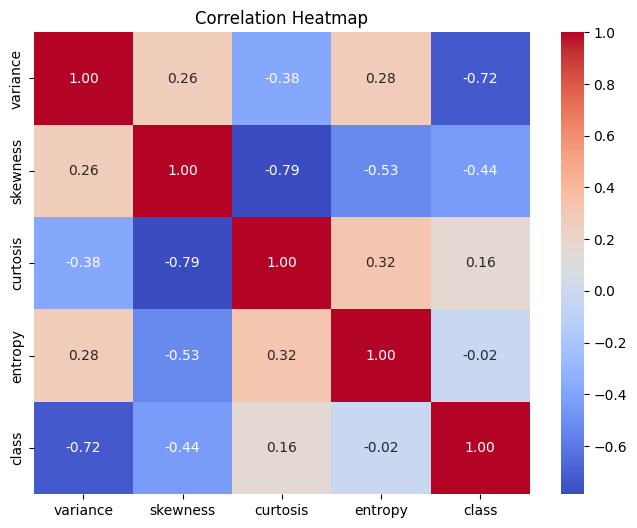

In [5]:
### 2. Statistical Summary
# Compute descriptive statistics and create a correlation heatmap.

# YOUR CODE HERE
print("Descriptive Statistics ")
print(banknote_df.describe())
corr_mat=banknote_df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
### 3. Data Quality
# Detect missing values, duplicates, and outliers using the Z-score method.
# YOUR CODE HERE
print("No of null elements : ",banknote_df.isnull().sum())
print(banknote_df[banknote_df.duplicated()].any())
duplicates = banknote_df[banknote_df.duplicated()]
print("\nNumber of Duplicate Rows:", banknote_df.duplicated().sum())
if not duplicates.empty:
    print("\nDuplicate Rows:\n", duplicates.head())
numeric_df = banknote_df.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(numeric_df))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
outlier_rows = banknote_df[outliers]
print("\nNumber of Outliers Detected (Z-score > 3):", outlier_rows.shape[0])
print("\nOutlier Rows:\n", outlier_rows.head())


No of null elements :  variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64
variance     True
skewness     True
curtosis     True
entropy      True
class       False
dtype: bool

Number of Duplicate Rows: 24

Duplicate Rows:
      variance  skewness  curtosis  entropy  class
47    -0.7869    9.5663   -3.7867  -7.5034      0
139   -0.2062    9.2207   -3.7044  -6.8103      0
190    0.9297   -3.7971    4.6429  -0.2957      0
195   -1.8584    7.8860   -1.6643  -1.8384      0
226    0.5706   -0.0248    1.2421  -0.5621      0

Number of Outliers Detected (Z-score > 3): 36

Outlier Rows:
      variance  skewness  curtosis  entropy  class
45   -0.78690    9.5663 -3.786700  -7.5034      0
47   -0.78690    9.5663 -3.786700  -7.5034      0
194  -2.34100   12.3784  0.704030  -7.5836      0
202  -0.78689    9.5663 -3.786700  -7.5034      0
291  -2.21530   11.9625  0.078538  -7.7853      0


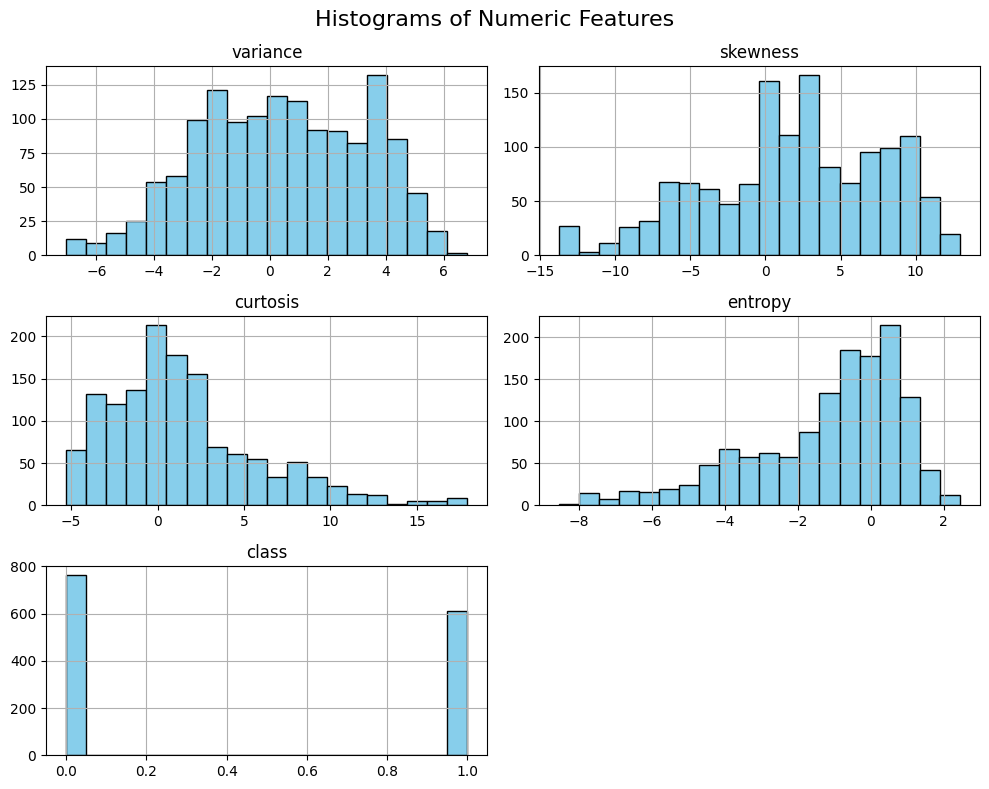

In [7]:
### 4. Visualization
# Create histograms for each feature and pair plots colored by class.

# YOUR CODE HERE
numeric_cols = banknote_df.select_dtypes(include='number').columns

banknote_df[numeric_cols].hist(
    figsize=(10, 8),
    bins=20,
    color='skyblue',
    edgecolor='black'
)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

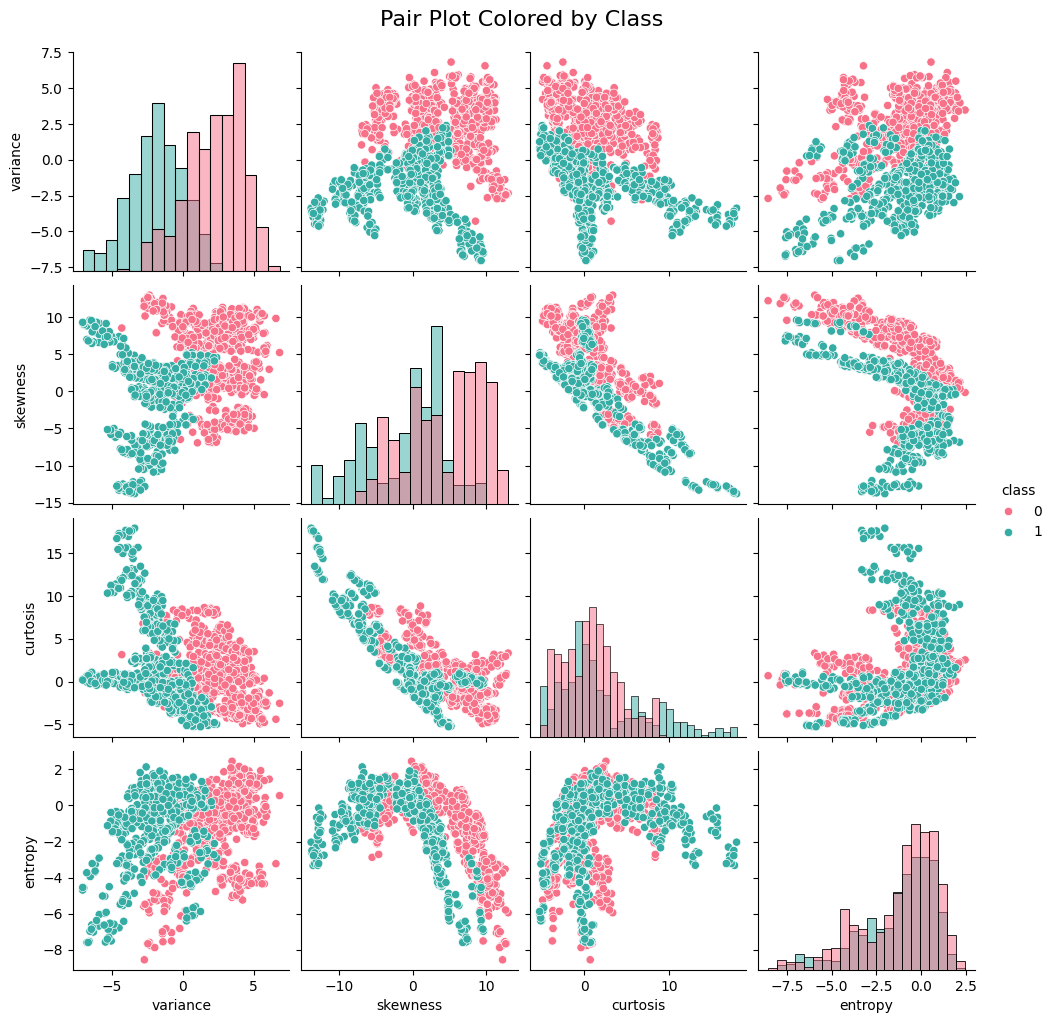

In [8]:
sns.pairplot(banknote_df, hue='class', diag_kind='hist', palette='husl')
plt.suptitle("Pair Plot Colored by Class", y=1.02, fontsize=16)
plt.show()

### 1.2 Preprocessing Pipeline

In [9]:
### 1. Data Cleaning
# Handle missing values and outliers identified in the previous step.

# YOUR CODE HERE
banknote_df.dropna(inplace=True)
banknote_df = banknote_df[~outliers]


In [10]:
###3. train test split 75-25 
X=banknote_df.drop('class',axis=1)
Y=banknote_df['class']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.25,
    stratify=Y,
    random_state=RANDOM_SEED  
)

In [11]:
### 2. Feature Scaling
# Implement and compare StandardScaler vs. MinMaxScaler.
# NOTE: For the rest of the assignment, choose one scaler and justify your choice.

# YOUR CODE HERE

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)
X_train_standard_df = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_train_minmax_df = pd.DataFrame(X_train_minmax, columns=X_train.columns)
print("\nStandardScaler Summary:\n", X_train_standard_df.describe().round(2))
print("\nMinMaxScaler Summary:\n", X_train_minmax_df.describe().round(2))


StandardScaler Summary:
        variance  skewness  curtosis  entropy
count   1002.00   1002.00   1002.00  1002.00
mean      -0.00      0.00      0.00     0.00
std        1.00      1.00      1.00     1.00
min       -2.75     -2.80     -1.65    -3.15
25%       -0.78     -0.57     -0.72    -0.52
50%        0.01      0.05     -0.15     0.29
75%        0.85      0.82      0.47     0.74
max        2.27      1.97      3.18     1.76

MinMaxScaler Summary:
        variance  skewness  curtosis  entropy
count   1002.00   1002.00   1002.00  1002.00
mean       0.55      0.59      0.34     0.64
std        0.20      0.21      0.21     0.20
min        0.00      0.00      0.00     0.00
25%        0.39      0.47      0.19     0.54
50%        0.55      0.60      0.31     0.70
75%        0.72      0.76      0.44     0.79
max        1.00      1.00      1.00     1.00


I choose Standard Scaler because : \
The StandardScaler standardizes features by removing the mean and scaling to unit variance. This means each feature will have a mean of 0 and a standard deviation of 1.\
So it Centers the data, improving numerical stability.

In [12]:
X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)
X_train= pd.DataFrame(X_train_std, columns=X_train.columns)
X_test= pd.DataFrame(X_test_std, columns=X_test.columns)
X_train.head()

,variance,skewness,curtosis,entropy
0,-0.111399,1.005979,-0.034795,0.098205
1,1.328085,0.855614,-0.618643,0.913084
2,-2.530709,1.348821,-0.283284,-2.882173
3,1.838700,1.449573,-1.393890,-1.367802
4,-1.917420,-1.505164,2.641270,-0.001701


# Part 2: SVM Implementation and Analysis (45 Points)

### 2.1 Kernel Implementation
Implement the following kernel functions from scratch. These will be passed to `sklearn.svm.SVC`.

In [13]:
def linear_kernel(x1, x2):
    """Implements the linear kernel: k(xi, xj) = xi.T * xj"""
    # YOUR CODE HERE
    return np.dot(x1, x2.T)

def polynomial_kernel(x1, x2, d, gamma, r):
    """Implements the polynomial kernel: k(xi, xj) = (gamma * xi.T * xj + r)^d"""
    # YOUR CODE HERE

    return (gamma * np.dot(x1, x2.T) + r) ** d

def rbf_kernel(x1, x2, gamma):
    """Implements the RBF kernel: k(xi, xj) = exp(-gamma * ||xi - xj||^2)"""
    # YOUR CODE HERE
    # Note: This is more complex to pass directly to SVC, which expects a callable that works on (n_samples1, n_features) and (n_samples2, n_features).
    # You can implement the grid search using scikit-learn's built-in kernels, but show your understanding here.
    # For a custom implementation with SVC, you'd typically need to precompute the Gram matrix.
    x1 = np.atleast_2d(x1)
    x2 = np.atleast_2d(x2)
    return np.exp(-gamma*(np.sum(x1**2, axis=1)[:, np.newaxis] + np.sum(x2**2, axis=1) - 2 * np.dot(x1, x2.T)))
    

# NOTE: While you are required to implement these, for the GridSearchCV part, you can use scikit-learn's built-in kernel arguments ('linear', 'poly', 'rbf') for efficiency.
# The from-scratch implementation demonstrates your understanding.

### 2.2 Hyperparameter Optimization
Code a grid search framework to find the optimal parameters using 5-fold stratified cross-validation.

Fitting 5 folds for each of 52 candidates, totalling 260 fits

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 1.0


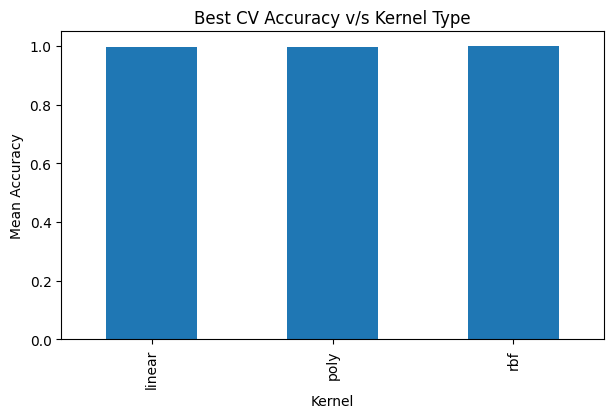

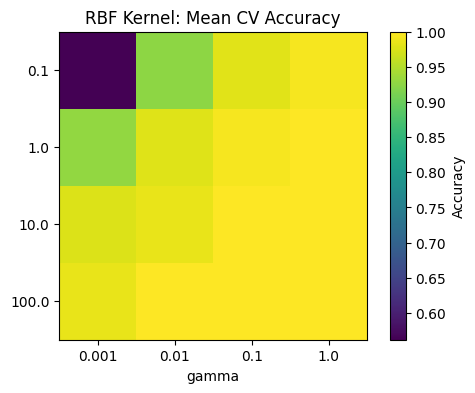

In [14]:
# 1. Define Parameter Grids
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10, 100],
        'degree': [2, 3],
        'gamma': [0.001, 0.01, 0.1, 1]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1]
    }
]




# 2. Implement 5-fold stratified cross-validation with GridSearchCV
# YOUR CODE HERE
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svc = SVC()

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_standard, Y_train)


# 3. Store and visualize results for each parameter combination (GridSearchCV does this automatically)
# You can access the results via `grid_search.cv_results_`
# YOUR CODE HERE
results = pd.DataFrame(grid_search.cv_results_)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

plt.figure(figsize=(7, 4))
results.groupby('param_kernel')['mean_test_score'].max().plot(kind='bar')
plt.title("Best CV Accuracy v/s Kernel Type")
plt.ylabel("Mean Accuracy")
plt.xlabel("Kernel")
plt.show()


rbf_results = results[results['param_kernel'] == 'rbf']
pivot = rbf_results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

plt.figure(figsize=(6, 4))
plt.imshow(pivot, interpolation='nearest', cmap='viridis')
plt.title("RBF Kernel: Mean CV Accuracy")
plt.xlabel("gamma")
plt.colorbar(label="Accuracy")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.show()

### 2.3 Mathematical Analysis

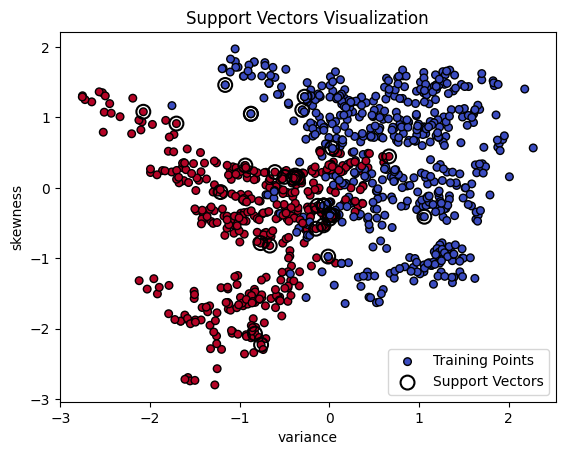


Number of support vectors: 35
Total training samples: 1002
Percentage of support vectors: 3.49%
Number of support vectors: 35
Total training samples: 1002
Percentage of support vectors: 3.49%



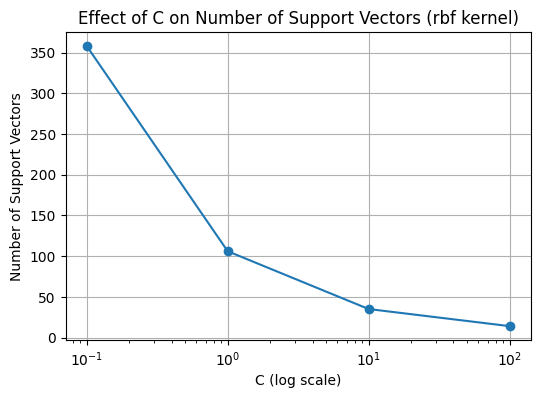

In [15]:
### 1. Support Vector Analysis
# - Extract support vector indices and visualize them.
# - Calculate the percentage of training samples that become support vectors.
# - Show how the number of support vectors changes with the C parameter.

# YOUR CODE HERE
best_model=grid_search.best_estimator_
support_indices=best_model.support_
support_vectors = X_train.iloc[support_indices].values 

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1],
            c=Y_train, cmap='coolwarm', s=30, edgecolors='k', label='Training Points')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='black', linewidth=1.5,
            label='Support Vectors')
plt.title("Support Vectors Visualization")
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.legend()
plt.show()

print()

print(f"Number of support vectors: {len(support_indices)}")
print(f"Total training samples: {len(X_train)}")
print(f"Percentage of support vectors: {100 * len(support_indices) / len(X_train):.2f}%")



print(f"Number of support vectors: {len(support_indices)}")
print(f"Total training samples: {len(X_train)}")
print(f"Percentage of support vectors: {100 * len(support_indices) / len(X_train):.2f}%")

print()

best_params= grid_search.best_params_
best_kernel=best_params['kernel']
best_gamma=best_params['gamma']
selected_grid = next((g for g in param_grid if best_kernel in g['kernel']), None)
C = selected_grid['C']
n_supports = []
for c in C:
    if best_kernel == 'linear':
        model = SVC(kernel='linear', C=c)
    elif best_kernel == 'poly':
        model = SVC(
            kernel='poly',
            C=c,
            gamma=best_gamma
        )
    else :
        model = SVC(
            kernel='rbf',
            C=c,
            gamma=best_gamma
        )
    model.fit(X_train_standard, Y_train)
    n_supports.append(len(model.support_))

plt.figure(figsize=(6, 4))
plt.plot(C, n_supports, marker='o')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("Number of Support Vectors")
plt.title(f"Effect of C on Number of Support Vectors ({best_kernel} kernel)")
plt.grid(True)
plt.show()





Top 2 features (by linear SVM weights): ['curtosis', 'skewness']


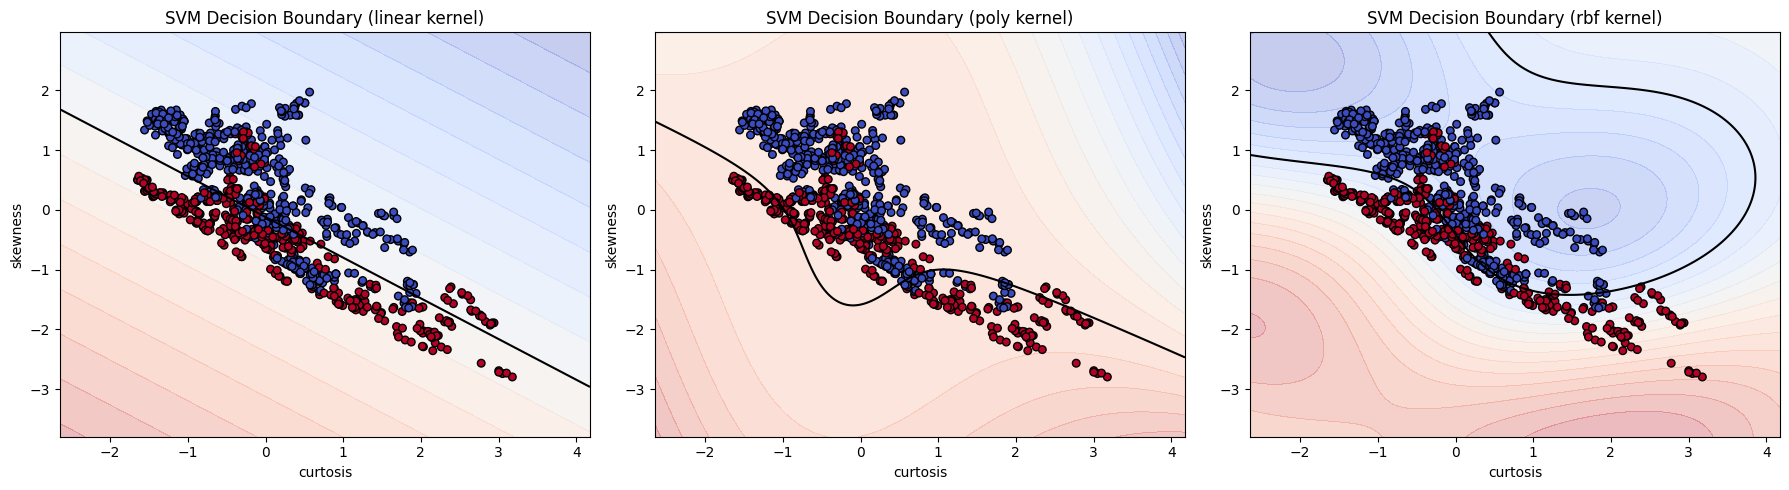

In [16]:
### 2. Decision Boundary Visualization
# - Plot 2D decision boundaries using the two most important features.
# - Create contour plots showing decision function values.
# - Compare boundaries across different kernels.

# YOUR CODE HERE

linear_svm = SVC(kernel='linear', C=best_params['C'])
linear_svm.fit(X_train_std, Y_train)

# Get absolute weight magnitudes
importance = np.abs(linear_svm.coef_[0])
feature_indices = np.argsort(importance)[-2:]
print("Top 2 features (by linear SVM weights):", list(X_train.columns[feature_indices]))
 

X_vis = X_train_std[:, feature_indices]
y_vis = Y_train
kernels = ['linear', 'poly', 'rbf']
models = []
for kernel in kernels:
    best_params = grid_search.best_params_.copy()
    best_params['kernel'] = kernel
    valid_params = {k: v for k, v in best_params.items() if k in SVC().get_params()}
    model = SVC(**valid_params)
    model.fit(X_vis, y_vis)
    models.append(model)



x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
fig,axes=plt.subplots(1, 3, figsize=(18, 5))

for i, (model, kernel) in enumerate(zip(models, kernels)):
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axes[i]
    contour = ax.contourf(xx, yy, Z, levels=20, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.contour(xx, yy, Z, colors='k', levels=[0], linewidths=1.5)
    ax.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=30,
               cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(f"SVM Decision Boundary ({kernel} kernel)")
    ax.set_xlabel(X_train.columns[feature_indices[0]])
    ax.set_ylabel(X_train.columns[feature_indices[1]])
plt.tight_layout()
plt.show()

C=0.01   → Margin width = 1.5140
C=0.1    → Margin width = 0.9106
C=1      → Margin width = 0.8355
C=10     → Margin width = 0.8281
C=100    → Margin width = 0.8275


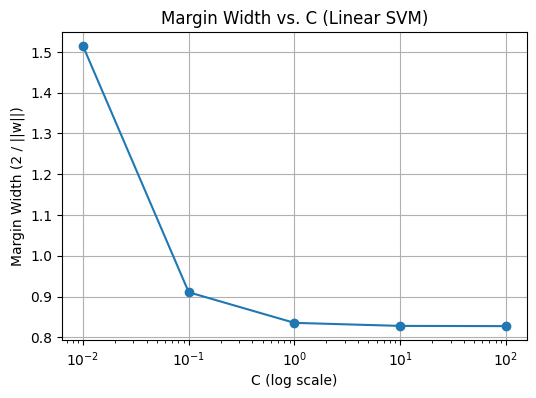

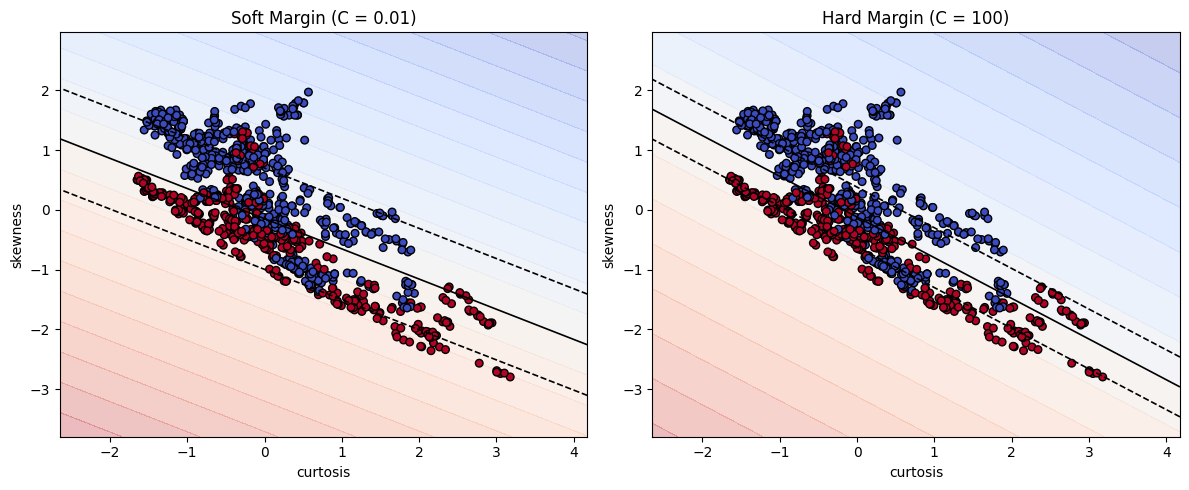

In [17]:
### 3. Margin Analysis
# - For linear SVM, calculate and display margin width: 2 / ||w||.
# - Show how margin width changes with different C values.
# - Visualize the effect of hard vs. soft margins.

C_values = [0.01, 0.1, 1, 10, 100]
margin_widths = []
for C in C_values:
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X_vis, y_vis)
    w_norm = np.linalg.norm(svm_linear.coef_)
    margin = 2 / w_norm
    margin_widths.append(margin)
    print(f"C={C:<6} → Margin width = {margin:.4f}")
plt.figure(figsize=(6,4))
plt.plot(C_values, margin_widths, marker='o')
plt.xscale('log')
plt.title("Margin Width vs. C (Linear SVM)")
plt.xlabel("C (log scale)")
plt.ylabel("Margin Width (2 / ||w||)")
plt.grid(True)
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
soft_C, hard_C = 0.01, 100
models = [
    ("Soft Margin (C = 0.01)", SVC(kernel='linear', C=soft_C).fit(X_vis, y_vis)),
    ("Hard Margin (C = 100)", SVC(kernel='linear', C=hard_C).fit(X_vis, y_vis))
]
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
for i, (title, model) in enumerate(models):
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axes[i]
    contour = ax.contourf(xx, yy, Z, levels=20, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=1.2)
    ax.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel(X_train.columns[feature_indices[0]])
    ax.set_ylabel(X_train.columns[feature_indices[1]])

plt.tight_layout()
plt.show()

# Part 3: Performance Evaluation (25 Points)

### 3.1 Comprehensive Metrics

In [18]:
### 1. Classification Metrics
# Compute Accuracy, Precision, Recall, F1-score (macro and weighted) for the best model.
# NOTE:- DO NOT USE SKLEARN METRICS FOR EVALUATION!!! Implement the metrics from scratch as you have idea of the formulas
best_svm=grid_search.best_estimator_
best_svm =best_svm.fit(X_train_std, Y_train) # Your best estimator from GridSearchCV
y_pred = best_svm.predict(X_test_std)
# YOUR CODE HERE
def compute_metrics(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    labels = np.unique(y_true)
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    
    precision_sum = 0
    recall_sum = 0
    support_sum = 0
    f1_avg=0
    for label in labels:
        TP = np.sum((y_pred == label) & (y_true == label))
        FP = np.sum((y_pred == label) & (y_true != label))
        FN = np.sum((y_pred != label) & (y_true == label))
        support = np.sum(y_true == label)
        
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        f1_avg+=f1
        precision_sum += precision * support
        recall_sum += recall * support
        support_sum += support
    f1_macro=f1_avg/len(labels)
    precision_weighted = precision_sum / support_sum
    recall_weighted = recall_sum / support_sum
    f1_weighted = 2 * (precision_weighted * recall_weighted) / (precision_weighted + recall_weighted) \
                  if (precision_weighted + recall_weighted) > 0 else 0
    
    return accuracy, precision_weighted, recall_weighted, f1_weighted, f1_macro

accuracy, precision_weighted, recall_weighted, f1_weighted, f1_macro = compute_metrics(Y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")
print(f" Precision: {precision_weighted*100:.2f}")
print(f" Recall: {recall_weighted*100:.2f}") 
print(f" F1-score Macro: {f1_macro*100:.2f}")
print(f" F1-score Weighted: {f1_weighted*100:.2f}")


Accuracy: 100.00
 Precision: 100.00
 Recall: 100.00
 F1-score Macro: 100.00
 F1-score Weighted: 100.00


In [19]:
### 2. Confusion Matrix
# Display the confusion matrix for the best performing model on the test set.
# YOUR CODE HERE
def compute_confusion_matrix(y_true, y_pred):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    for i, actual in enumerate(labels):
        for j, predicted in enumerate(labels):
            matrix[i, j] = np.sum((y_true == actual) & (y_pred == predicted))
    return matrix, labels

cm, labels = compute_confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[188   0]
 [  0 146]]


### 3.2 Comparative Analysis

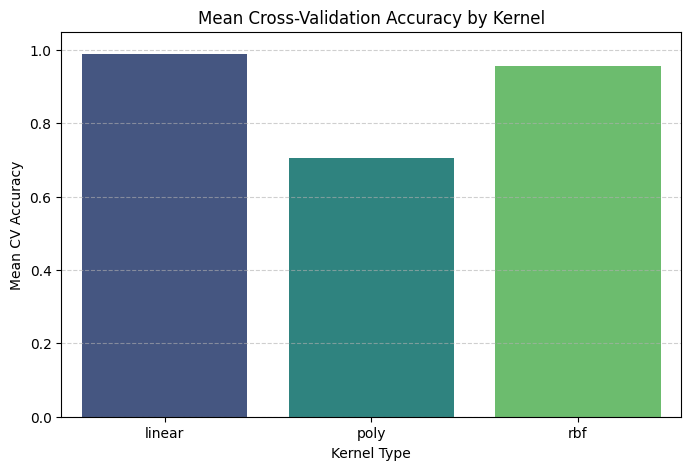

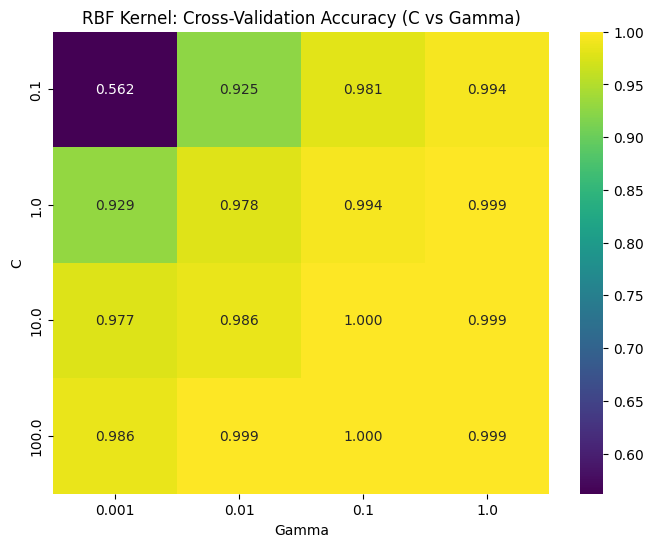

In [20]:
### 1. Performance Comparison
# - Bar plots comparing test accuracy across all kernel-parameter combinations.
# - Heatmap showing cross-validation scores across the parameter grid.

# YOUR CODE HERE
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 5))
sns.barplot(data=results, x='param_kernel',hue='param_kernel',legend=False,  y='mean_test_score', errorbar=None, palette='viridis')
plt.title("Mean Cross-Validation Accuracy by Kernel")
plt.xlabel("Kernel Type")
plt.ylabel("Mean CV Accuracy")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
rbf_results = results[results['param_kernel'] == 'rbf']
pivot = rbf_results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap='viridis')
plt.title("RBF Kernel: Cross-Validation Accuracy (C vs Gamma)")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()

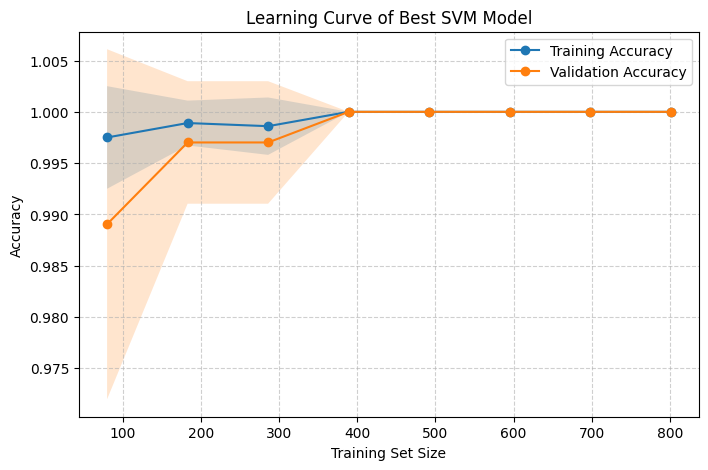

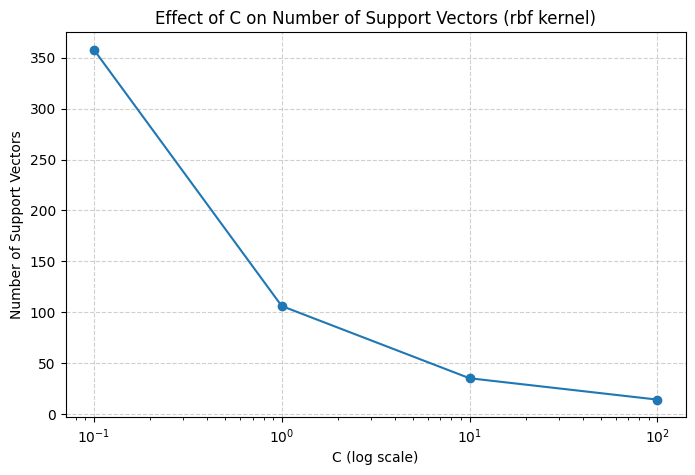

In [21]:
### 2. Learning Analysis
# - Learning curves showing training vs. validation accuracy.
# - Plot showing the relationship between support vector count and the C parameter.

# YOUR CODE HERE
train_sizes, train_scores, val_scores = learning_curve(
    grid_search.best_estimator_,
    X_train_std,
    Y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    random_state=42
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.title("Learning Curve of Best SVM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
C_values = [0.1, 1, 10, 100]
kernel = grid_search.best_params_['kernel']
gamma = grid_search.best_params_.get('gamma', 'scale')

n_supports = []

for C in C_values:
    model = SVC(kernel=kernel, C=C, gamma=gamma)
    model.fit(X_train_std, Y_train)
    n_supports.append(len(model.support_))

plt.figure(figsize=(8, 5))
plt.plot(C_values, n_supports, marker='o')
plt.xscale('log')
plt.title(f"Effect of C on Number of Support Vectors ({kernel} kernel)")
plt.xlabel("C (log scale)")
plt.ylabel("Number of Support Vectors")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [22]:


summary_data = []

for kernel in kernels:
    kernel_results = results[results['param_kernel'] == kernel]
    
    # Special handling for polynomial kernel: evaluate both degree=2 and degree=3
    if kernel == 'poly':
        for degree in [2, 3]:
            degree_results = kernel_results[kernel_results['param_degree'] == degree]
            if degree_results.empty:
                continue

            best_idx = degree_results['mean_test_score'].idxmax()
            best_row = degree_results.loc[best_idx]

            best_params = {
                k.replace('param_', ''): int(best_row[k]) if k == 'param_degree' else best_row[k]
                for k in results.columns
                if k.startswith('param_') and pd.notnull(best_row[k])
            }

            cv_score = best_row['mean_test_score']

            model = SVC(**best_params)
            model.fit(X_train_standard, Y_train)

            y_pred = model.predict(X_test_standard)

            test_acc = accuracy_score(Y_test, y_pred)
            precision = precision_score(Y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(Y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(Y_test, y_pred, average='weighted', zero_division=0)

            total_samples = len(X_train_standard)
            sv_percent = (len(model.support_vectors_) / total_samples) * 100

            summary_data.append({
                'Kernel': f"{kernel} (degree={degree})",
                'Parameters': best_params,
                'CV Score': round(cv_score, 4),
                'Test Acc': round(test_acc, 4),
                'Precision': round(precision, 4),
                'Recall': round(recall, 4),
                'F1': round(f1, 4),
                'Support Vectors (%)': round(sv_percent, 2)
            })

    else:
        best_idx = kernel_results['mean_test_score'].idxmax()
        best_row = kernel_results.loc[best_idx]

        best_params = {
            k.replace('param_', ''): int(best_row[k]) if k == 'param_degree' else best_row[k]
            for k in results.columns
            if k.startswith('param_') and pd.notnull(best_row[k])
        }

        cv_score = best_row['mean_test_score']

        model = SVC(**best_params)
        model.fit(X_train_standard, Y_train)

        y_pred = model.predict(X_test_standard)

        test_acc = accuracy_score(Y_test, y_pred)
        precision = precision_score(Y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(Y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(Y_test, y_pred, average='weighted', zero_division=0)

        total_samples = len(X_train_standard)
        sv_percent = (len(model.support_vectors_) / total_samples) * 100

        summary_data.append({
            'Kernel': kernel,
            'Parameters': best_params,
            'CV Score': round(cv_score, 4),
            'Test Acc': round(test_acc, 4),
            'Precision': round(precision, 4),
            'Recall': round(recall, 4),
            'F1': round(f1, 4),
            'Support Vectors (%)': round(sv_percent, 2)
        })

summary_df = pd.DataFrame(summary_data).sort_values(by='Test Acc', ascending=False)
print(summary_df)


            Kernel                                         Parameters  \
3              rbf         {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.1}   
2  poly (degree=3)  {'C': 100.0, 'kernel': 'poly', 'degree': 3, 'g...   
0           linear                    {'C': 10.0, 'kernel': 'linear'}   
1  poly (degree=2)  {'C': 10.0, 'kernel': 'poly', 'degree': 2, 'ga...   

   CV Score  Test Acc  Precision  Recall      F1  Support Vectors (%)  
3    1.0000    1.0000     1.0000  1.0000  1.0000                 3.49  
2    0.9970    1.0000     1.0000  1.0000  1.0000                 1.80  
0    0.9950    0.9820     0.9827  0.9820  0.9821                 2.99  
1    0.7714    0.7515     0.7515  0.7515  0.7484                62.18  


### 3.3 Results Summary Table
Fill in the following table with the results from your best models for each kernel type.

# Part 4: Analysis and Interpretation (10 Points)
Provide a detailed written analysis in this section. Address all the points mentioned in the assignment PDF.

### 1. Kernel Performance
* **Best Kernel:** Which kernel performed best and why? (Relate to decision boundaries and data separability).
* **Decision Boundaries:** How does the choice of kernel (linear, polynomial, RBF) affect the shape and complexity of the decision boundaries?
* **Computational Complexity:** Compare the computational complexity of the different kernels during training and prediction.

RBF Kernel performed best as it achieved the highest cross-validation and test accuracy.\
The RBF kernel can handle non-linear decision boundaries very effectively by mapping data into a high-dimensional feature space.

### 2. Regularization Effects
* **Impact of C:** Explain the impact of the C parameter on model complexity, the margin, and overall performance. How did it affect the bias-variance tradeoff?
* **C and Support Vectors:** What is the relationship between the C parameter and the number of support vectors? Explain why this relationship exists.
* **Overfitting/Underfitting:** Were there signs of overfitting or underfitting at different C values? (e.g., very high C or very low C).

The parameter C in SVM controls the trade-off between maximizing the margin and minimizing classification error.\
Low C (strong regularization) The model prioritizes a wider margin, even if some points are misclassified. \
High C (weak regularization) The model tries to classify every training point correctly, allowing a narrower margin.\
Accuracy improved from low C (0.1) → medium C (1 or 10).\
Low C -> More support vectors -> Underfitting\
High C -> Fewer support vectors -> Overfitting


### 3. Dataset-Specific Insights
* **SVM Suitability:** How well does the SVM algorithm handle your specific dataset's characteristics (e.g., number of features, sample size, separability)?
* **Class Imbalance:** Did your dataset have any class imbalance? If so, how might it have affected the SVM's performance and what strategies could mitigate it?
* **Feature Scaling:** What was the impact of feature scaling (StandardScaler vs. MinMaxScaler) on the performance of the SVM? Why is scaling crucial for distance-based algorithms like SVM?

The Support Vector Machine (SVM) algorithm is particularly powerful for datasets that are :\
Moderate in size (not millions of samples)\
Well-structured with clear but possibly non-linear boundaries

SVMs can be sensitive to class imbalance\
The max-margin objective tries to find a boundary equidistant from both classes.\
If one class is much larger, the SVM tends to bias the boundary toward the minority class, leading to lower recall for that minority.

SVMs are distance-based algorithms, meaning their behavior heavily depends on the scale of input features.\
Without proper scaling \
Features with larger numeric ranges dominate the computation of distances in the kernel function.\
The margin and decision boundary become distorted, leading to poor model performance.

### 4. Recommendations
* **Best Model:** Based on your analysis, which model configuration (kernel and hyperparameters) would you recommend for production use on this dataset? Justify your choice based on performance metrics, complexity, and interpretability.
* **Future Work:** What are potential improvements or future work that could be explored? (e.g., trying different kernels, feature engineering, addressing class imbalance more formally).

SVM with RBF kernel, using approximately C = 10 and γ (gamma) = 0.1 \
Highest CV score and test accuracy (≈ best F1, recall) \
It balances accuracy, generalization, and computational cost effectively.

Perform feature selection or dimensionality reduction (e.g., PCA, Recursive Feature Elimination) to remove redundant or noisy features.\
Try other kernels such as Sigmoid or custom kernels (e.g., string kernels, graph kernels) suited to the data domain.

# Bonus Section (Optional) (10 points)

In [23]:
### Advanced optimization ,Code Quality and optimization